In [362]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [363]:
travel_df_train = pd.read_csv('Traveldata_train.csv')
travel_df_test = pd.read_csv('Traveldata_test.csv')

survey_df_train = pd.read_csv('Surveydata_train.csv')
survey_df_test = pd.read_csv('Surveydata_test.csv')

In [364]:
def exp_data_ana(df,target,tvar):
    pd.set_option('display.expand_frame_repr', False)
#     print('\n****Display first 5 rows****')
#     print('****************************')
#     print(df.head())

    #Shape of the Data
    print('\n****Shape of the data****')
    print('*************************')
    print('No of rows\t:\t{}\nNo of columns\t:\t{}'.format(df.shape[0],df.shape[1]))
    
    print('\n****Show infomation of the data****')
    print('***********************************')
    print(df.info())

    if(target==True):
        #print the % of each class in the Target variable
        perclass = df[tvar].value_counts(normalize=True)
        print('\n****Target Varible Distribution****')
        print('************************************')
        print('{} Yes\t:\t{}% \n{} No\t:\t{}%'.format(tvar,round(perclass[1]*100,2),tvar,round(perclass[0]*100,2)))
    
    #Check for missing value
    print('\n****Missing Values in the Dataset****')
    print('*************************************')
    msv = df.isnull().sum()[df.isnull().sum()>0]
    if msv.empty:
        print('There is no missing values in the data.') 
    else:
        for i in range(msv.count()):
            print('{} Missing values in {} which is {}% of total data'.format(msv[i],msv.index[i],round(((msv[i]/df.shape[0])*100),2)))

    # #Check for duplicate values
    print('\n****Duplicates data in the Dataset****')
    print('**************************************')

    dups = df.duplicated().sum()
    if dups ==0:
        print('There is no duplicate values in the data.') 
    else:
        print(dups)

    print('\n****Describe the data****')
    print('*************************')
    print(df.describe())

    print('\n****Describe the catagorical data****')
    print('*************************')
    print(df.describe(include=['O']))

In [365]:
df_train = travel_df_train.merge(survey_df_train,how='left',on=['ID'])
df_test = travel_df_test.merge(survey_df_test,how='left',on=['ID'])

In [366]:
exp_data_ana(df_train,True,'Overall_Experience')


****Shape of the data****
*************************
No of rows	:	94379
No of columns	:	25

****Show infomation of the data****
***********************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   CustomerType             85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   TypeTravel               85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   DepartureDelay_in_Mins   94322 non-null  float64
 8   ArrivalDelay_in_Mins     94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_comfort             94318 non-null  object 
 11  Seat_Class          

In [367]:
exp_data_ana(df_test,False,False)


****Shape of the data****
*************************
No of rows	:	35602
No of columns	:	24

****Show infomation of the data****
***********************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   CustomerType             32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   TypeTravel               32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   DepartureDelay_in_Mins   35573 non-null  float64
 8   ArrivalDelay_in_Mins     35479 non-null  float64
 9   Seat_comfort             35580 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_time_conveni

In [368]:
cat=[]
num=[]
for i in df_train.loc[:, ~df_train.columns. isin(['EmployeeID'])]:
    if df_train[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
       
print('Catogorical Variables : \n*****************\n', cat) 
print('\nNumerical Variables : \n*****************\n', num) 

Catogorical Variables : 
*****************
 ['Gender', 'CustomerType', 'TypeTravel', 'Travel_Class', 'Seat_comfort', 'Seat_Class', 'Arrival_time_convenient', 'Catering', 'Platform_location', 'Onboardwifi_service', 'Onboard_entertainment', 'Online_support', 'Onlinebooking_Ease', 'Onboard_service', 'Leg_room', 'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding']

Numerical Variables : 
*****************
 ['ID', 'Age', 'Travel_Distance', 'DepartureDelay_in_Mins', 'ArrivalDelay_in_Mins', 'Overall_Experience']


In [369]:
#Unique values of the catagrical variables
for i in cat:
    print(f'Unique values of the catagorical variable {i}')
    print('*******************************************************\n')
    print(df_train[i].value_counts())
    print('\n')

Unique values of the catagorical variable Gender
*******************************************************

Female    47815
Male      46487
Name: Gender, dtype: int64


Unique values of the catagorical variable CustomerType
*******************************************************

Loyal Customer       69823
disloyal Customer    15605
Name: CustomerType, dtype: int64


Unique values of the catagorical variable TypeTravel
*******************************************************

Business travel    58617
Personal Travel    26536
Name: TypeTravel, dtype: int64


Unique values of the catagorical variable Travel_Class
*******************************************************

Eco         49342
Business    45037
Name: Travel_Class, dtype: int64


Unique values of the catagorical variable Seat_comfort
*******************************************************

acceptable          21158
need improvement    20946
good                20595
poor                15185
excellent           12971
extremely poor

In [370]:
# bins = [7,30,45,60,85]
# labels=['7-30','31-45','46-60','61-85']

# df_train['AgeRange'] = pd.cut(df_train['Age'],bins=bins, labels=labels)

# bins = [0,320,640,960,1280,1600]
# labels=['0-320','321-640','641-960','961-1280','1281-1600']

# df_train['DepartureDelay_in_MinsRange'] = pd.cut(df_train['DepartureDelay_in_Mins'],bins=bins, labels=labels)

# bins = [0,320,640,960,1280,1600]
# labels=['0-320','321-640','641-960','961-1280','1281-1600']

# df_train['ArrivalDelay_in_MinsRange'] = pd.cut(df_train['ArrivalDelay_in_Mins'],bins=bins, labels=labels)

In [371]:
nmstr=df_train['CustomerType'].isnull().sum()
nmste=df_test['CustomerType'].isnull().sum()
print(f'Number of missing values in CustomerType: \n Train\t:\t{nmstr}\n Test\t:\t{nmste}')    

Number of missing values in CustomerType: 
 Train	:	8951
 Test	:	3383


In [372]:
df_train.groupby(['Travel_Class'])['CustomerType'].agg(pd.Series.mode)

Travel_Class
Business    Loyal Customer
Eco         Loyal Customer
Name: CustomerType, dtype: object

In [373]:
#Impute the Department with mode value of group by "EductaionField"
df_train['CustomerType'] = df_train.groupby(['Travel_Class'])['CustomerType'].apply(lambda x: x.fillna(x.mode()[0]))
df_test['CustomerType'] = df_test.groupby(['Travel_Class'])['CustomerType'].apply(lambda x: x.fillna(x.mode()[0]))

In [374]:
nmstr=df_train['CustomerType'].isnull().sum()
nmste=df_test['CustomerType'].isnull().sum()
print(f'Number of missing values in CustomerType: \n Train\t:\t{nmstr}\n Test\t:\t{nmste}')    

Number of missing values in CustomerType: 
 Train	:	0
 Test	:	0


In [375]:
nmstr=df_train['Age'].isnull().sum()
nmste=df_test['Age'].isnull().sum()
print(f'Number of missing values in Age: \n Train\t:\t{nmstr}\n Test\t:\t{nmste}')    

Number of missing values in Age: 
 Train	:	33
 Test	:	11


In [376]:
df_train.groupby(by=['Gender','CustomerType','Travel_Class'])['Age'].median()

Gender  CustomerType       Travel_Class
Female  Loyal Customer     Business        44.0
                           Eco             40.0
        disloyal Customer  Business        30.0
                           Eco             26.0
Male    Loyal Customer     Business        44.0
                           Eco             40.0
        disloyal Customer  Business        30.0
                           Eco             25.0
Name: Age, dtype: float64

In [377]:
#Impute the Age with group by "WorkExprience" and "EductaionField"
df_train['Age'] = df_train['Age'].fillna(df_train.groupby(by=['Gender','CustomerType','Travel_Class'])['Age'].transform('median'))
df_test['Age'] = df_test['Age'].fillna(df_test.groupby(by=['Gender','CustomerType','Travel_Class'])['Age'].transform('median'))

In [378]:
nmstr=df_train['Age'].isnull().sum()
nmste=df_test['Age'].isnull().sum()
print(f'Number of missing values in Age: \n Train\t:\t{nmstr}\n Test\t:\t{nmste}')    

Number of missing values in Age: 
 Train	:	0
 Test	:	0


In [379]:
nmstr=df_train['DepartureDelay_in_Mins'].isnull().sum()
nmste=df_test['DepartureDelay_in_Mins'].isnull().sum()
print(f'Number of missing values in DepartureDelay_in_Mins: \n Train\t:\t{nmstr}\n Test\t:\t{nmste}')    

Number of missing values in DepartureDelay_in_Mins: 
 Train	:	57
 Test	:	29


In [380]:
df_train['DepartureDelay_in_Mins'] = df_train['DepartureDelay_in_Mins'].fillna(0)
df_test['DepartureDelay_in_Mins'] = df_test['DepartureDelay_in_Mins'].fillna(0)

# df_train['ArrivalDelay_in_Mins'] = df_train['ArrivalDelay_in_Mins'].fillna(0)
# df_test['ArrivalDelay_in_Mins'] = df_test['ArrivalDelay_in_Mins'].fillna(0)

In [381]:
nmstr=df_train['DepartureDelay_in_Mins'].isnull().sum()
nmste=df_test['DepartureDelay_in_Mins'].isnull().sum()
print(f'Number of missing values in DepartureDelay_in_Mins: \n Train\t:\t{nmstr}\n Test\t:\t{nmste}')    

Number of missing values in DepartureDelay_in_Mins: 
 Train	:	0
 Test	:	0


In [382]:
nmstr=df_train['ArrivalDelay_in_Mins'].isnull().sum()
nmste=df_test['ArrivalDelay_in_Mins'].isnull().sum()
print(f'Number of missing values in ArrivalDelay_in_Mins: \n Train\t:\t{nmstr}\n Test\t:\t{nmste}')    

Number of missing values in ArrivalDelay_in_Mins: 
 Train	:	357
 Test	:	123


In [383]:
round(df_train.groupby(by=['Arrival_time_convenient'])['ArrivalDelay_in_Mins'].mean(),2)

Arrival_time_convenient
acceptable          15.28
excellent           14.55
extremely poor      12.96
good                15.05
need improvement    15.60
poor                15.34
Name: ArrivalDelay_in_Mins, dtype: float64

In [384]:
df_train['ArrivalDelay_in_Mins'] = df_train['ArrivalDelay_in_Mins'].fillna(df_train.groupby(by=['Arrival_time_convenient'])['ArrivalDelay_in_Mins'].transform('mean'))
df_test['ArrivalDelay_in_Mins'] = df_test['ArrivalDelay_in_Mins'].fillna(df_test.groupby(by=['Arrival_time_convenient'])['ArrivalDelay_in_Mins'].transform('mean'))

In [385]:
df_train['ArrivalDelay_in_Mins'] = df_train['ArrivalDelay_in_Mins'].fillna(0)
df_test['ArrivalDelay_in_Mins'] = df_test['ArrivalDelay_in_Mins'].fillna(0)

In [386]:
nmstr=df_train['ArrivalDelay_in_Mins'].isnull().sum()
nmste=df_test['ArrivalDelay_in_Mins'].isnull().sum()
print(f'Number of missing values in ArrivalDelay_in_Mins: \n Train\t:\t{nmstr}\n Test\t:\t{nmste}')    

Number of missing values in ArrivalDelay_in_Mins: 
 Train	:	0
 Test	:	0


In [387]:
nmstr=df_train['Arrival_time_convenient'].isnull().sum()
nmste=df_test['Arrival_time_convenient'].isnull().sum()
print(f'Number of missing values in Arrival_time_convenient: \n Train\t:\t{nmstr}\n Test\t:\t{nmste}')    

Number of missing values in Arrival_time_convenient: 
 Train	:	8930
 Test	:	3325


In [388]:
df_train['Arrival_time_convenient'] = df_train['Arrival_time_convenient'].fillna('0')
df_test['Arrival_time_convenient'] = df_test['Arrival_time_convenient'].fillna('0')

In [389]:
df_train['Arrival_time_convenient'].value_counts()

good                19574
excellent           17684
acceptable          15177
need improvement    14990
poor                13692
0                    8930
extremely poor       4332
Name: Arrival_time_convenient, dtype: int64

In [390]:
df_test['Arrival_time_convenient'].value_counts()

good                7361
excellent           6589
acceptable          5844
need improvement    5684
poor                5131
0                   3325
extremely poor      1668
Name: Arrival_time_convenient, dtype: int64

In [391]:
df_train['Arrival_time_convenient']=df_train.apply(
    lambda row: 'excellent' if (row['Arrival_time_convenient']=='0' and row['ArrivalDelay_in_Mins']<=2) else row['Arrival_time_convenient'],
    axis=1
)

df_train['Arrival_time_convenient']=df_train.apply(
    lambda row: 'acceptable' if (row['Arrival_time_convenient']=='0' and (row['ArrivalDelay_in_Mins']>2 and row['ArrivalDelay_in_Mins']<=100)) else row['Arrival_time_convenient'],
    axis=1
)

df_train['Arrival_time_convenient']=df_train.apply(
    lambda row: 'poor' if (row['Arrival_time_convenient']=='0' and (row['ArrivalDelay_in_Mins']>100 and row['ArrivalDelay_in_Mins']<=640)) else row['Arrival_time_convenient'],
    axis=1
)

df_train['Arrival_time_convenient']=df_train.apply(
    lambda row: 'good' if (row['Arrival_time_convenient']=='0' and (row['ArrivalDelay_in_Mins']>640 and row['ArrivalDelay_in_Mins']<=960)) else row['Arrival_time_convenient'],
    axis=1
)

df_train['Arrival_time_convenient']=df_train.apply(
    lambda row: 'extremely poor' if (row['Arrival_time_convenient']=='0' and (row['ArrivalDelay_in_Mins']>960 and row['ArrivalDelay_in_Mins']<=1280)) else row['Arrival_time_convenient'],
    axis=1
)

df_train['Arrival_time_convenient']=df_train.apply(
    lambda row: 'need improvement' if (row['Arrival_time_convenient']=='0' and (row['ArrivalDelay_in_Mins']>1280 and row['ArrivalDelay_in_Mins']<=1600)) else row['Arrival_time_convenient'],
    axis=1
)

df_train['Arrival_time_convenient'].value_counts()

excellent           23101
good                19575
acceptable          18391
need improvement    14990
poor                13990
extremely poor       4332
Name: Arrival_time_convenient, dtype: int64

In [392]:
df_test['Arrival_time_convenient']=df_test.apply(
    lambda row: 'excellent' if (row['Arrival_time_convenient']=='0' and row['ArrivalDelay_in_Mins']<=2) else row['Arrival_time_convenient'],
    axis=1
)

df_test['Arrival_time_convenient']=df_test.apply(
    lambda row: 'acceptable' if (row['Arrival_time_convenient']=='0' and (row['ArrivalDelay_in_Mins']>2 and row['ArrivalDelay_in_Mins']<=100)) else row['Arrival_time_convenient'],
    axis=1
)

df_test['Arrival_time_convenient']=df_test.apply(
    lambda row: 'poor' if (row['Arrival_time_convenient']=='0' and (row['ArrivalDelay_in_Mins']>100 and row['ArrivalDelay_in_Mins']<=640)) else row['Arrival_time_convenient'],
    axis=1
)

df_test['Arrival_time_convenient']=df_test.apply(
    lambda row: 'good' if (row['Arrival_time_convenient']=='0' and (row['ArrivalDelay_in_Mins']>640 and row['ArrivalDelay_in_Mins']<=960)) else row['Arrival_time_convenient'],
    axis=1
)

df_test['Arrival_time_convenient']=df_test.apply(
    lambda row: 'extremely poor' if (row['Arrival_time_convenient']=='0' and (row['ArrivalDelay_in_Mins']>960 and row['ArrivalDelay_in_Mins']<=1280)) else row['Arrival_time_convenient'],
    axis=1
)

df_test['Arrival_time_convenient']=df_test.apply(
    lambda row: 'need improvement' if (row['Arrival_time_convenient']=='0' and (row['ArrivalDelay_in_Mins']>1280 and row['ArrivalDelay_in_Mins']<=1600)) else row['Arrival_time_convenient'],
    axis=1
)

df_test['Arrival_time_convenient'].value_counts()

excellent           8564
good                7361
acceptable          7075
need improvement    5684
poor                5250
extremely poor      1668
Name: Arrival_time_convenient, dtype: int64

In [393]:
nmstr=df_train['Arrival_time_convenient'].isnull().sum()
nmste=df_test['Arrival_time_convenient'].isnull().sum()
print(f'Number of missing values in Arrival_time_convenient: \n Train\t:\t{nmstr}\n Test\t:\t{nmste}')    

Number of missing values in Arrival_time_convenient: 
 Train	:	0
 Test	:	0


In [394]:
nmstr=df_train['TypeTravel'].isnull().sum()
nmste=df_test['TypeTravel'].isnull().sum()
print(f'Number of missing values in TypeTravel: \n Train\t:\t{nmstr}\n Test\t:\t{nmste}')    

Number of missing values in TypeTravel: 
 Train	:	9226
 Test	:	3448


In [395]:
df_train.groupby(['CustomerType','Travel_Class'])['TypeTravel'].agg(pd.Series.mode)

CustomerType       Travel_Class
Loyal Customer     Business        Business travel
                   Eco             Personal Travel
disloyal Customer  Business        Business travel
                   Eco             Business travel
Name: TypeTravel, dtype: object

In [396]:
#Impute the Department with mode value of group by "EductaionField"
df_train['TypeTravel'] = df_train.groupby(['CustomerType','Travel_Class'])['TypeTravel'].apply(lambda x: x.fillna(x.mode()[0]))
df_test['TypeTravel'] = df_test.groupby(['CustomerType','Travel_Class'])['TypeTravel'].apply(lambda x: x.fillna(x.mode()[0]))

In [397]:
nmstr=df_train['TypeTravel'].isnull().sum()
nmste=df_test['TypeTravel'].isnull().sum()
print(f'Number of missing values in TypeTravel: \n Train\t:\t{nmstr}\n Test\t:\t{nmste}')    

Number of missing values in TypeTravel: 
 Train	:	0
 Test	:	0


In [398]:
nmstr=df_train['TypeTravel'].isnull().sum()
nmste=df_test['TypeTravel'].isnull().sum()
print(f'Number of missing values in TypeTravel: \n Train\t:\t{nmstr}\n Test\t:\t{nmste}')    

Number of missing values in TypeTravel: 
 Train	:	0
 Test	:	0


In [400]:
cat = ['Gender','Seat_comfort','Catering','Platform_location',
'Onboardwifi_service','Onboard_entertainment',
'Online_support','Onlinebooking_Ease','Leg_room','Baggage_handling','Checkin_service','Cleanliness','Online_boarding']
for i in cat:
    df_train[i] = df_train[i].fillna(df_train[i].mode()[0])
    df_test[i] = df_test[i].fillna(df_test[i].mode()[0])

In [402]:
nmstr=df_train['Onboard_service'].isnull().sum()
nmste=df_test['Onboard_service'].isnull().sum()
print(f'Number of missing values in Onboard_service : \n Train\t:\t{nmstr}\n Test\t:\t{nmste}')    

Number of missing values in Onboard_service : 
 Train	:	7601
 Test	:	2872


In [401]:
df_train.groupby(['Onboardwifi_service','Onboard_entertainment'])['Onboard_service'].agg(pd.Series.mode)

Onboardwifi_service  Onboard_entertainment
acceptable           acceptable                                  good
                     excellent                                   good
                     extremely poor                        acceptable
                     good                                        good
                     need improvement                            good
                     poor                                        good
excellent            acceptable                                  good
                     excellent                                   good
                     extremely poor                        acceptable
                     good                                        good
                     need improvement                            good
                     poor                                        good
extremely poor       acceptable               [acceptable, excellent]
                     excellent                 

In [403]:
df_train['Onboard_service'] = df_train.groupby(['Onboardwifi_service','Onboard_entertainment'])['Onboard_service'].apply(lambda x: x.fillna(x.mode()[0]))
df_test['Onboard_service'] = df_test.groupby(['Onboardwifi_service','Onboard_entertainment'])['Onboard_service'].apply(lambda x: x.fillna(x.mode()[0]))

In [404]:
#Check for missing value
print('\n****Missing Values in the Dataset****')
print('*************************************')
msv = df_train.isnull().sum()[df_train.isnull().sum()>0]
if msv.empty:
    print('There is no missing values in the data.') 
else:
    for i in range(msv.count()):
        print('{} Missing values in {} which is {}% of total data'.format(msv[i],msv.index[i],round(((msv[i]/df_train.shape[0])*100),2)))


****Missing Values in the Dataset****
*************************************
There is no missing values in the data.


In [405]:
#Check for missing value
print('\n****Missing Values in the Dataset****')
print('*************************************')
msv = df_test.isnull().sum()[df_test.isnull().sum()>0]
if msv.empty:
    print('There is no missing values in the data.') 
else:
    for i in range(msv.count()):
        print('{} Missing values in {} which is {}% of total data'.format(msv[i],msv.index[i],round(((msv[i]/df_test.shape[0])*100),2)))


****Missing Values in the Dataset****
*************************************
There is no missing values in the data.


In [ ]:
num

['ID',
 'Age',
 'Travel_Distance',
 'DepartureDelay_in_Mins',
 'ArrivalDelay_in_Mins',
 'Overall_Experience']

In [ ]:
# fig, axis=plt.subplots(nrows=4,ncols=2)
# fig.set_size_inches(15,17)
# fig.tight_layout()


# for i in range(1,5):
#     sns.distplot(df_train[num[i]],ax=axis[i-1][0]);
#     sns.boxplot(df_train[num[i]],ax=axis[i-1][1]);

In [ ]:
#Define the function to identify the outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
# #Fix the outliers 
# columns = ['Travel_Distance','DepartureDelay_in_Mins','ArrivalDelay_in_Mins']
# for column in columns:
#     lr,ur=remove_outlier(df_train[column])
#     df_train[column]=np.where(df_train[column]>ur,ur,df_train[column])

In [ ]:
# fig, axis=plt.subplots(nrows=4,ncols=2)
# fig.set_size_inches(15,17)
# fig.tight_layout()


# for i in range(1,5):
#     sns.distplot(df_train[num[i]],ax=axis[i-1][0]);
#     sns.boxplot(df_train[num[i]],ax=axis[i-1][1]);

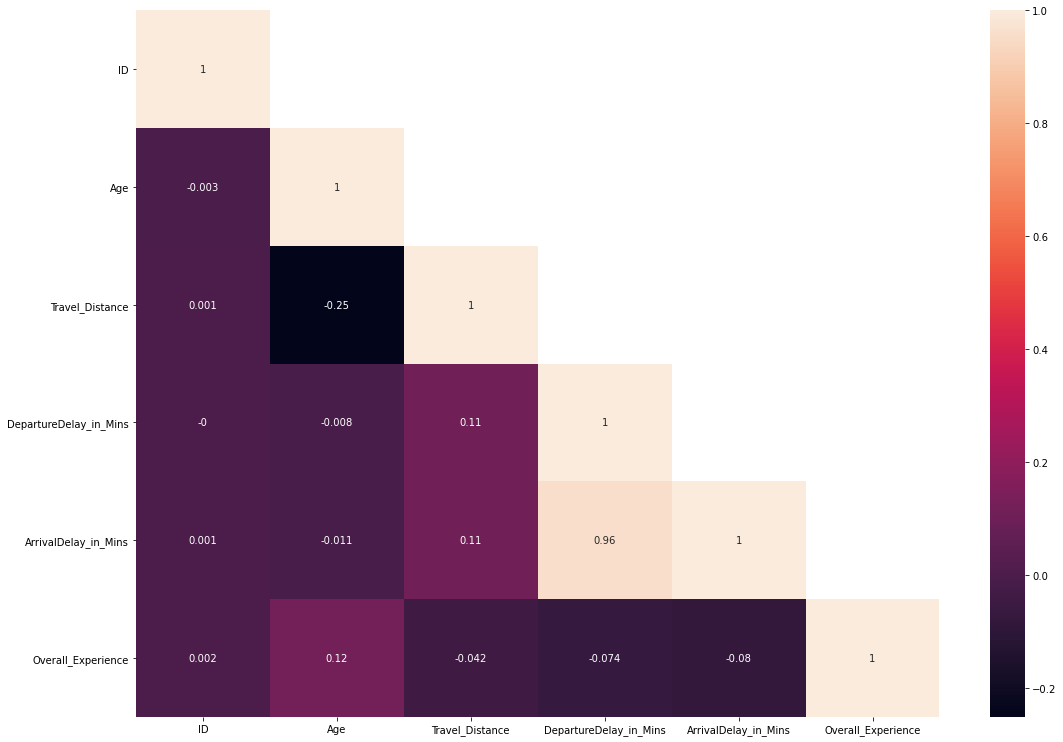

In [406]:
#Heat map - Relationalship analysis
plt.figure(figsize=(18,13))
sns.heatmap(round(df_train.corr(),3),annot=True,mask=np.triu(df_train.corr(),+1));

In [407]:
from sklearn.ensemble import RandomForestClassifier
from IPython.display import HTML 
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve,plot_confusion_matrix

In [408]:
def display_dataframe(df):
    numeric_col_mask = df.dtypes.apply(lambda d: issubclass(np.dtype(d).type, np.number))

    # Dict used to center the table headers
    d = dict(selector="th",
        props=[('text-align', 'center')])

    # Style
    display(df.style.set_properties(subset=df.columns[numeric_col_mask], # right-align the numeric columns and set their width
                            **{'width':'5em', 'height':'3em','text-align':'right','border-color': 'white','border-style' :'solid'})\
            .set_properties(subset=df.columns[~numeric_col_mask], # left-align the non-numeric columns and set their width
                            **{'width':'5em', 'text-align':'left'})\
            .format(lambda x: '{:,.0f}'.format(x) if x > 1e3 else '{:,.2f}'.format(x), # format the numeric values
                    subset=pd.IndexSlice[:,df.columns[numeric_col_mask]])\
            .hide_index()\
#            .highlight_max('color: green')\
            .set_table_styles([d])) # center the header

In [409]:
#AUC and ROC Value
def roc_model(model_name,x,y):
    # predict probabilities
    probs = model_name.predict_proba(x)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    from sklearn.metrics import roc_auc_score
    auc = roc_auc_score(y, probs)
    fpr, tpr, _ = roc_curve(y, probs)
    return probs,auc,fpr,tpr

In [410]:
def con_mat(y_train,y_predict_train,y_test,y_predict_test):
    fig, axis=plt.subplots(nrows=1,ncols=2)
    fig.set_size_inches(10,4)
    fig.tight_layout()

    cm=confusion_matrix(y_train,y_predict_train,labels=[0, 1])

    df_cm = pd.DataFrame(cm, index = [i for i in ["Conservative","Labour"]],
    columns = [i for i in ["Conservative","Labour"]])
    sns.heatmap(df_cm, annot=True ,fmt='g',ax=axis[0])
    axis[0].title.set_text('Confustion Matrix - Train Data')

    cm=confusion_matrix(y_test,y_predict_test,labels=[0, 1])

    df_cm = pd.DataFrame(cm, index = [i for i in ["Conservative","Labour"]],
    columns = [i for i in ["Conservative","Labour"]])
    sns.heatmap(df_cm, annot=True ,fmt='g',ax=axis[1])
    axis[1].title.set_text('Confustion Matrix - Test Data')

In [411]:
def scores_train_test(model,X_train,X_test,y_train,y_test,y_predict_train,y_predict_test,mname):
    #model=bgcl


    s = [[None for j in range(6)] for i in range(2)]

    print(str(model).split('(')[0])
    print('********************************\n')

    model_name = str(model).split('(')[0]
    s[0][0] = model_name + '_' + mname +'_Train'
    s[1][0] = model_name + '_' + mname +'_Test'

    for prf in range(1,4):
        s[0][prf]=round(score(y_train,y_predict_train)[prf-1][1]*100,2)
        s[1][prf]= (round(score(y_test,y_predict_test)[prf-1][1]*100,2))

    s[0][prf+1]=round(model.score(X_train,y_train)*100,2)
    s[1][prf+1]=round(model.score(X_test,y_test)*100,2)    

    probs, auc, fpr, tpr = roc_model(model,X_train,y_train)
    probst, auc1, fpr1, tpr1 = roc_model(model,X_test,y_test)

    s[0][prf+2]=round(auc*100,2)
    s[1][prf+2]=round(auc1*100,2)

    df = pd.DataFrame(data=s,columns=['Scores','Precision','Recall','F-Score','Accuracy','AUC'])

    con_mat(y_train,y_predict_train,y_test,y_predict_test)

    plt.figure(figsize=(5,5))

    plt.plot(fpr,tpr, marker='o', label='AUC - Train:' + str(s[0][prf+2]))
    plt.plot(fpr1,tpr1, marker='o', label='AUC - Test:' + str(s[1][prf+2]))

    plt.legend(loc="lower right")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')

    print('Display Metrics of Train and Test Data')
    print('***************************************')

    display_dataframe(df)
    return(df)

In [412]:
for feature in df_train.columns: 
    if df_train[feature].dtype == 'object': 
        df_train[feature] = pd.Categorical(df_train[feature]).codes

        
for feature in df_test.columns: 
    if df_test[feature].dtype == 'object': 
        df_test[feature] = pd.Categorical(df_test[feature]).codes

In [413]:
tvar = 'Overall_Experience'

In [414]:
X = df_train.drop(['ID',tvar], axis=1)
y = df_train[tvar]

In [415]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30,random_state=0)

In [416]:
#Scale the data using feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [417]:
sc_train = scaler.fit_transform(X_train)
X_train_sc = pd.DataFrame(sc_train, index=X_train.index, columns=X_train.columns)

In [418]:
sc_test = scaler.transform(X_test)
X_test_sc = pd.DataFrame(sc_test, index=X_test.index, columns=X_test.columns)

RandomForestClassifier
********************************

Display Metrics of Train and Test Data
***************************************


Scores,Precision,Recall,F-Score,Accuracy,AUC
RandomForestClassifier_Base_Train,100.00,100.00,100.00,100.00,100.00
RandomForestClassifier_Base_Test,96.17,94.37,95.26,94.90,99.07


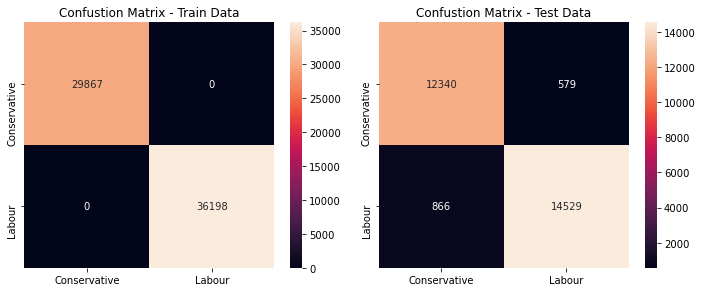

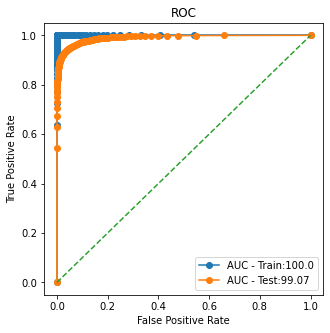

In [438]:
rfcl = RandomForestClassifier(random_state=0,max_features=14)

rfcl.fit(X_train, y_train)
rf_train = rfcl.predict(X_train)
rf_test = rfcl.predict(X_test)

res_df = scores_train_test(rfcl,X_train,X_test,y_train,y_test,rf_train,rf_test,'Base')

In [ ]:
# features = X_train.columns
# importances = rfcl.feature_importances_
# indices = np.argsort(importances)

# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), [features[i] for i in indices])
# plt.xlabel('Relative Importance')
# plt.show()

In [420]:
def rfrun(x_train,train_labels,x_test,max_f,no_est,max_dep,min_sam,min_spl):
    param_grid = {
        'criterion': ['gini'],
        'max_depth': max_dep, #,7,9],
        'max_features':max_f, #,32],
        'min_samples_leaf': min_sam,#15,20],
        'min_samples_split': min_spl,#75,60],
        'n_estimators': no_est
    }

    rfcl = RandomForestClassifier(random_state=1)

    grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5,scoring='accuracy')
    grid_search.fit(x_train, train_labels)
    print(grid_search.best_params_)
    
    rfcl = grid_search.best_estimator_
    rfcl

    rfcl_y_predict_train = rfcl.predict(x_train)
    rfcl_y_predict_test = rfcl.predict(x_test)
    return(rfcl,rfcl_y_predict_train,rfcl_y_predict_test)   

In [451]:
from sklearn.model_selection import GridSearchCV
rfcl_tuned,rfcl_y_predict_train,rfcl_y_predict_test = rfrun(
    X_train,y_train,X_test,[13,17,21],[100,200,300],[15,17,25],[1,3],[3,6])

res_df = scores_train_test(rfcl_tuned,X_train,X_test,y_train,y_test,rfcl_y_predict_train,rfcl_y_predict_test,'Tuned')

KeyboardInterrupt: 

RandomForestClassifier
********************************

Display Metrics of Train and Test Data
***************************************


Scores,Precision,Recall,F-Score,Accuracy,AUC
RandomForestClassifier_Tuned_Train,99.96,100.00,99.98,99.97,100.00
RandomForestClassifier_Tuned_Test,96.16,94.61,95.38,99.97,100.00


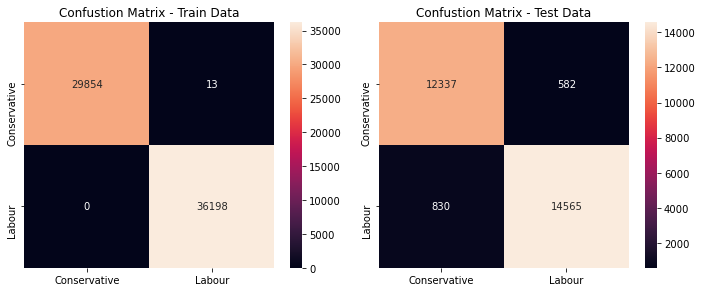

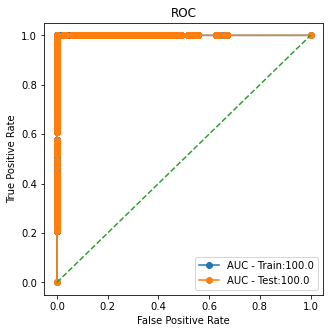

In [442]:
res_df = scores_train_test(rfcl_tuned,X_train,X_test,y_train,y_test,rfcl_y_predict_train,rfcl_y_predict_test,'Tuned')

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# for i in range(1,9,2):
#     KNN_Model = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
#     KNN_Model.fit(X_train_sc,y_train)
#     y_test_p = KNN_Model.predict(X_test_sc)
#     print(f'Accuracy Score for K={i} : ',KNN_Model.score(X_test_sc,y_test))

In [ ]:
# from sklearn.neural_network import MLPClassifier

In [441]:
def nnrun(x_train,train_labels,x_test,hid_ly,max_int,tol,sol,act):
    param_grid = {
        'hidden_layer_sizes': hid_ly,
        'max_iter': max_int,
        'activation':act,
        'solver': sol,
        'tol': tol,
        'random_state':[0] #1
    }

    nncl = MLPClassifier(random_state=0)

    grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 5,scoring='accuracy')

    grid_search.fit(x_train, train_labels)
    grid_search.best_params_
    print(grid_search.best_params_)
    nn_model = grid_search.best_estimator_
    nn_model
    nn_train = nn_model.predict(x_train)
    nn_test = nn_model.predict(x_test)
    return(nn_model,nn_train,nn_test)   

KeyboardInterrupt: 

In [ ]:
nn_model,nn_train_p,nn_test_p = nnrun(X_train_sc,y_train,X_test_sc,[100],[1000],[0.001],['sgd'],['relu'])

In [ ]:
res_df = scores_train_test(nn_model,X_train_sc,X_test_sc,y_train,y_test,nn_train_p,nn_test_p,'Tuned')

In [443]:
df_test.drop(tvar,axis=1,inplace=True)

In [444]:
final_model = rfcl_tuned.fit(X,y)

In [445]:
rf_output = final_model.predict(df_test.drop('ID',axis=1))

In [446]:
rf_output

array([1, 1, 1, ..., 1, 1, 0])

In [447]:
df_test[tvar]= rf_output

In [448]:
m='tuned'

In [449]:
df_test[['ID',tvar]].to_csv('./Hack_submission_'+m+'.csv',index=False)